#### machine learning
א. למידה מפוקחת

In [260]:
# Importing required libraries
import numpy as np
from sklearn.linear_model import LinearRegression


In [261]:
# נתונים
X = np.array([50, 75, 100]).reshape(-1, 1)
y = np.array([500000, 750000, 1000000])

# יצירת המודל
model = LinearRegression()
model.fit(X, y)

# תחזית
print(f"מחיר לדירה בגודל 85 מ\"ר: {model.predict([[85]])[0]:,.0f} ש\"ח")

מחיר לדירה בגודל 85 מ"ר: 850,000 ש"ח


דוגמא נוספת  לרגרסיה לינארית

In [262]:
# Generating synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features (independent variable)
y = 2.5 * X + np.random.randn(100, 1) * 5  # Linear relation with noise

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
split_ration = 0.8
split_index = int(len(X)*split_ratio)
X_train, X_test = X[:split_index] , X[split_index:]
y_train,y_test = y[:split_index] , y[split_index:]

In [265]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
# Fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [267]:
# Predictions
y_pred = model.predict(X_test)

In [268]:
import matplotlib.pyplot as plt

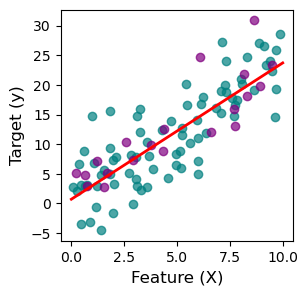

In [269]:
# Plotting the data
plt.figure(figsize=(3,3))
# Scatter plot of training data
plt.scatter(X_train, y_train, color='teal', 
            label='Training Data', alpha=0.7)

# Scatter plot of test data
plt.scatter(X_test, y_test, color='purple', 
            label='Testing Data', alpha=0.7)

# Regression line
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', 
         label='Regression Line', linewidth=2)

# Enhancing the plot
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
#plt.tight_layout()
plt.show()

**classiffication**

In [270]:
#mok data
from sklearn.datasets import make_blobs

In [271]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.9, random_state=42)


In [272]:
#if we want to see it as a df
import pandas as pd
df = pd.DataFrame(data = X,columns  =['feature_1', 'feature_2'])
df['target'] = y
df

,feature_1,feature_2,target
0,-7.752413,-8.494814,2
1,-8.514413,-7.610765,2
2,-0.946362,6.694683,0
3,4.226285,4.060846,1
4,-10.752064,-8.795474,2
...,...,...,...
295,-4.696085,9.728112,0
296,3.064788,0.908826,1
297,-5.563416,9.365090,0
298,-6.844632,-3.694879,2


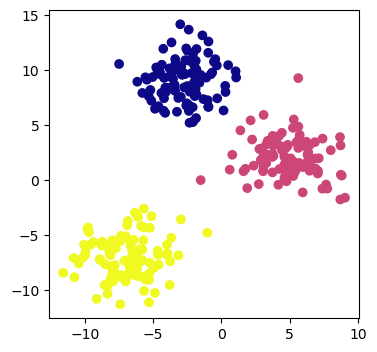

In [273]:
plt. figure (figsize = (4,4))
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='plasma')
plt.show()

עוד דוגמא קלסיפיקציה עם לקוחות

In [274]:
df = pd.read_csv('Mall_Customers.csv') 

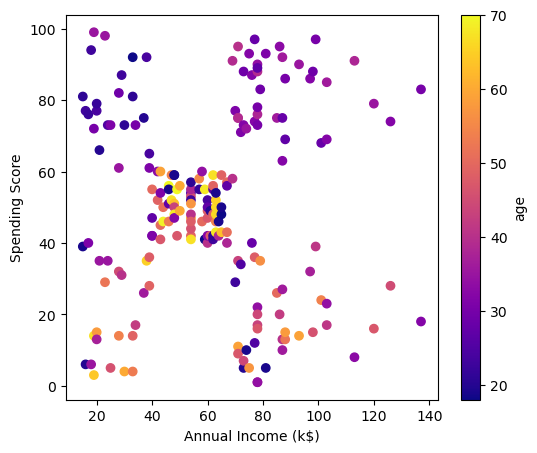

In [275]:
plt.figure(figsize=(6,5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Age'], cmap= 'plasma')
plt.xlabel('Annual Income (k$)')
plt.colorbar().set_label('age')
plt.ylabel('Spending Score')
plt.savefig('classification custumenrs.png', transparent = True)
plt.show()

יצירת הפונקציה בתרגיל

In [276]:
def make_lines (w1 = 1, b1 = 0, w2 = 1, b2 = 0):
    # Generate x values
    x = np.linspace(-10, 10, 100)

    # Define parameters for w and b
    w_values = [w1,w2]
    b_values = [b1,b2]

    # Generate y values for w/b variations
    y_1 = w_values[0] * x + b_values[0]
    y_2 = w_values[1] * x + b_values[1]
    

    # First figure: Varying w
    plt.plot(x, y_1, label=f"w={w_values[0]}, b={b_values[0]}")
    plt.plot(x, y_2, label=f"w={w_values[1]}, b={b_values[1]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(alpha=0.3)
    plt.legend()

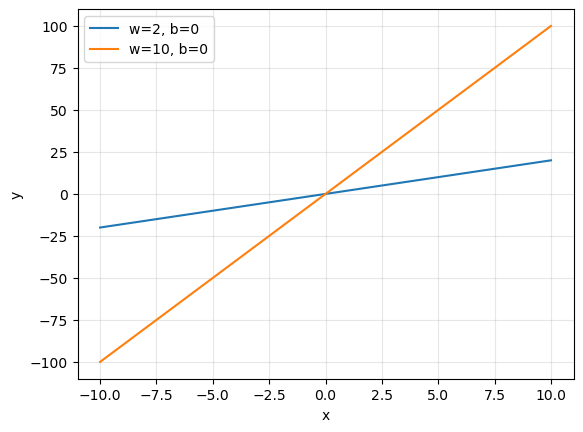

In [277]:
make_lines(w1=2, w2 =10)

with our data: btc

In [279]:
import yfinance as yf
#import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import numpy as np

In [280]:
btc = yf.download("BTC-USD", start="2024-01-01", end="2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [281]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-01 to 2024-12-30
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BTC-USD)  365 non-null    float64
 1   (Close, BTC-USD)      365 non-null    float64
 2   (High, BTC-USD)       365 non-null    float64
 3   (Low, BTC-USD)        365 non-null    float64
 4   (Open, BTC-USD)       365 non-null    float64
 5   (Volume, BTC-USD)     365 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [282]:
btc.columns = [col[0] for col in btc.columns]

In [283]:
#linear regression works with numbers!!
X = (btc.index - btc.index.min()).days.astype('int').values.reshape(-1, 1)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [284]:
y =btc['Open'].values.reshape(-1, 1)
y

array([[ 42280.234375  ],
       [ 44187.140625  ],
       [ 44961.6015625 ],
       [ 42855.81640625],
       [ 44192.98046875],
       [ 44178.953125  ],
       [ 43998.46484375],
       [ 43948.70703125],
       [ 46987.640625  ],
       [ 46121.5390625 ],
       [ 46656.07421875],
       [ 46354.79296875],
       [ 42799.4453125 ],
       [ 42842.26171875],
       [ 41715.06640625],
       [ 42499.3359375 ],
       [ 43132.1015625 ],
       [ 42742.3125    ],
       [ 41278.4609375 ],
       [ 41624.58984375],
       [ 41671.48828125],
       [ 41553.65234375],
       [ 39518.71484375],
       [ 39877.59375   ],
       [ 40075.55078125],
       [ 39936.81640625],
       [ 41815.625     ],
       [ 42126.125     ],
       [ 42030.9140625 ],
       [ 43300.2265625 ],
       [ 42946.25      ],
       [ 42569.76171875],
       [ 43077.640625  ],
       [ 43184.96484375],
       [ 42994.94140625],
       [ 42577.62109375],
       [ 42657.390625  ],
       [ 43090.01953125],
       [ 443

In [285]:
#spliting 80% 20%
split_ratio = 0.8
split_index = int(len(btc)*split_ratio)

In [286]:
X_train, X_test = X[:split_index], X[split_index:]

In [287]:
y_train, y_test =  y[:split_index], y[split_index:]

In [288]:
len(X_train)/len(X)

0.8

In [289]:
#creating a model
#from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [290]:
#fiting the data into the model
model.fit(X_train, y_train)

LinearRegression()

In [291]:
#testing the model:
y_pred = model.predict(X_test)

In [292]:
# Predict the price on 04/01/2025
future_date = (pd.to_datetime("2025-01-05")- btc.index.min()).days #להתאים את התאריך הרצוי לפורמט של הרגרסיה
future_price = model.predict([[future_date]])
print(f"Predicted price on 05/01/2025: ${future_price[0][0]}")

Predicted price on 05/01/2025: $70453.67185754293


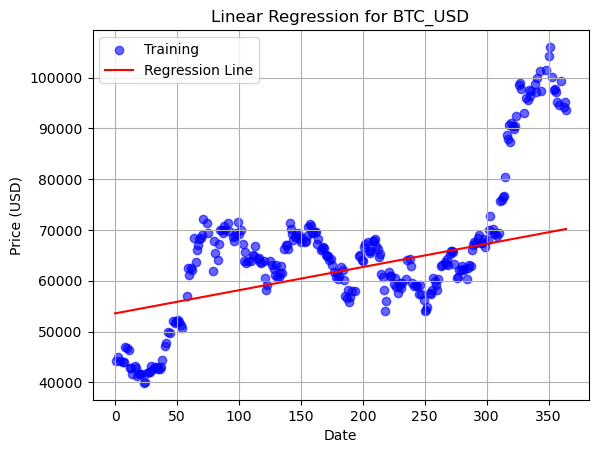

In [297]:
plt.scatter(X_train, y_train, label='Training', 
            color='blue', alpha=0.6)
plt.plot(X, model.predict(X), #ערכי איקס הם הימים שעברו מאז שהתחלנו וערכי ווי זה מה שהמודל מחשב עבורם
         label='Regression Line', color='red')
plt.title(f"Linear Regression for BTC_USD")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [294]:
## train test split ##
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [296]:
# Predict the price on 04/01/2025
future_date = (pd.to_datetime("2025-01-05")- btc.index.min()).days
future_price = model.predict([[future_date]])
print(f"Predicted price on 05/01/2025: ${future_price[0][0]}")

Predicted price on 05/01/2025: $70453.67185754293
